In [6]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [8]:
#df=pd.read_csv ("Dataset/complete.csv")
#not useful

In [36]:
dfs = []
for f in ['00', '10']:
    df=pd.read_csv(f"./Dataset/Songs_1960s_to_2010s/dataset-of-{f}s.csv")
    dfs.append(df)
df_merged = pd.concat(dfs)

In [37]:
df_merged.groupby(['artist', 'target'], as_index=False)['uri'].count().sort_values('uri', ascending=False)

,artist,target,uri
4949,Taylor Swift,1,52
2006,Glee Cast,1,52
1493,Drake,1,51
2785,Kenny Chesney,1,39
5293,Tim McGraw,1,35
...,...,...,...
2796,Kenny Rogers,1,1
2797,Kenny Rogers With Alison Krauss & Billy Dean,1,1
2798,Kenny Wayne Shepherd,0,1
2800,Kent Jones,1,1


In [41]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/1d/77/5e660d211906becd9f8e13e00d828f5e68b5e66d9b956f4646bb4882c68e/scipy-1.11.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached scipy-1.11.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 4.7 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Loading dataset

In [3]:
dfs = []
for f in ['00', '10', '60', '70', '80', '90']:
    df=pd.read_csv(f"./Dataset/Songs_1960s_to_2010s/dataset-of-{f}s.csv")
    dfs.append(df)
df_merged = pd.concat(dfs)
df_with_numerical_features = df_merged[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']]

# Analyses

## Distribution of features

To check the range of features' value and their distribution

In [15]:
df_merged.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


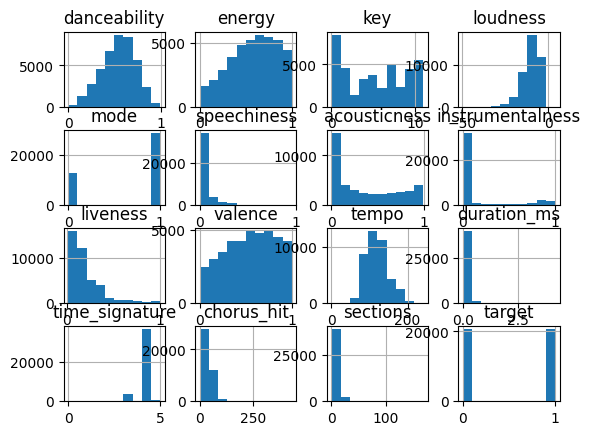

In [24]:
_ = df_merged.hist()

To see the distribution of features based on the target:

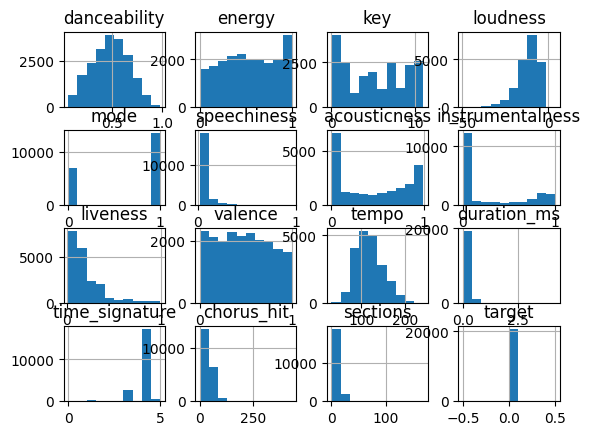

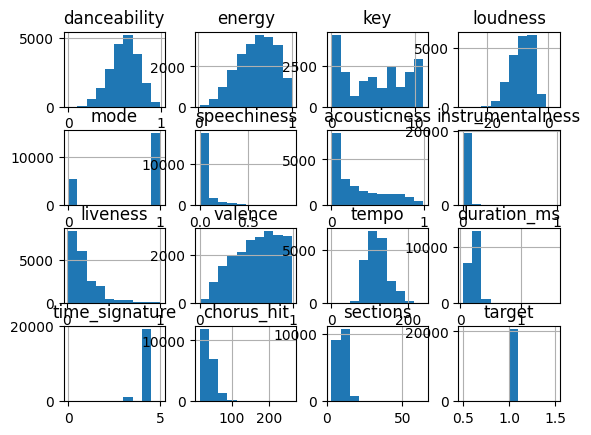

In [26]:
_ = df_merged.groupby('target').hist()

danceability


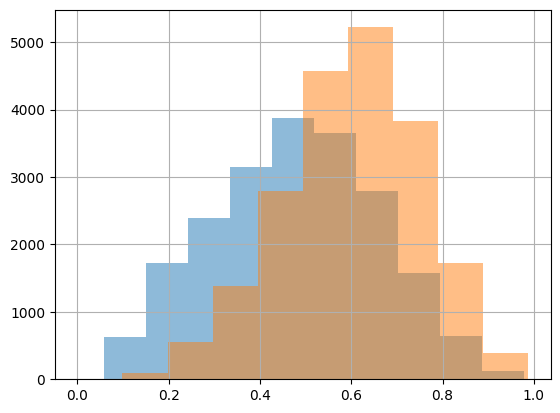

energy


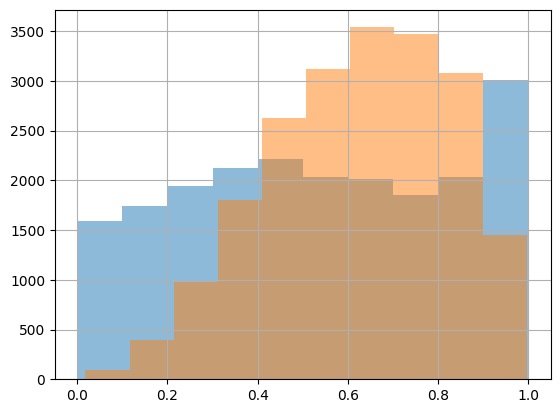

key


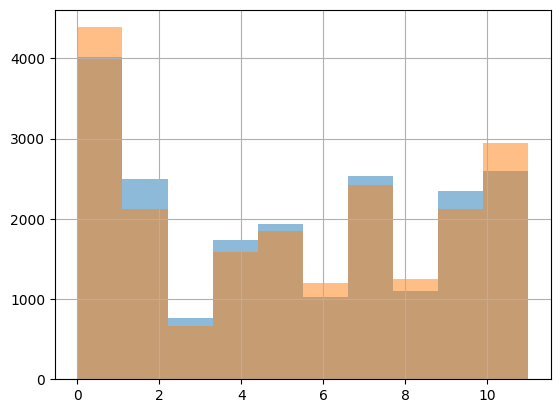

loudness


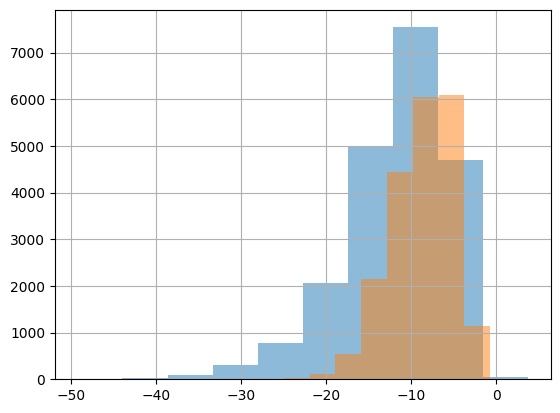

mode


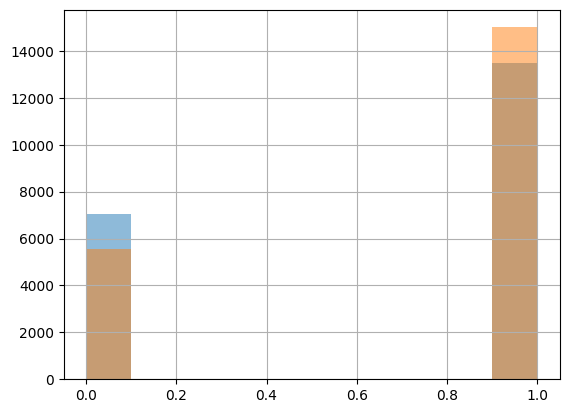

speechiness


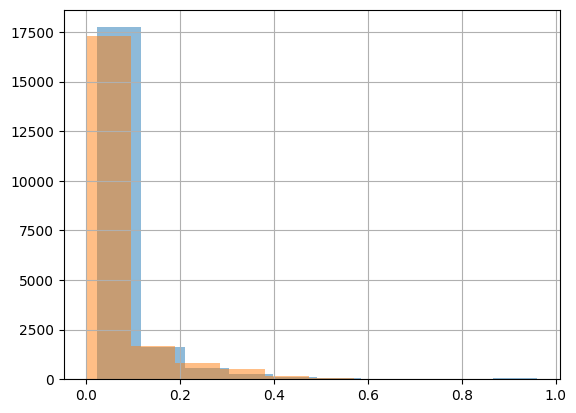

acousticness


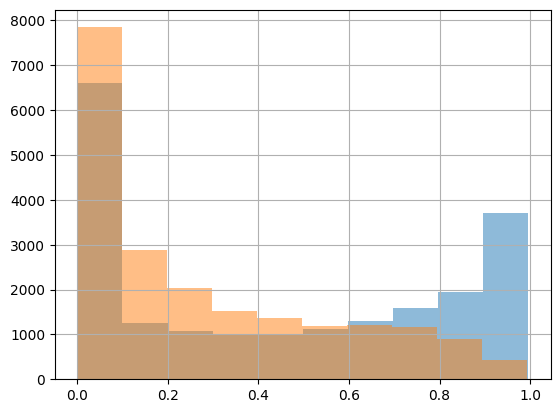

instrumentalness


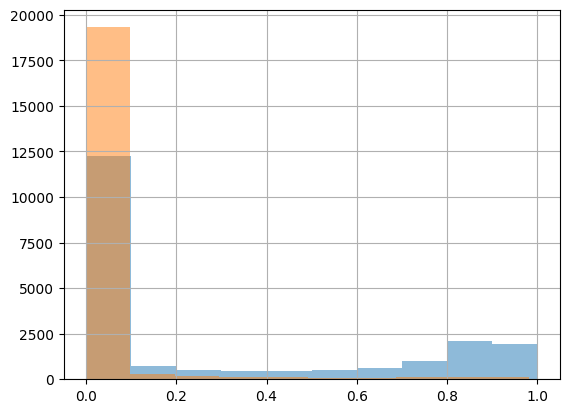

liveness


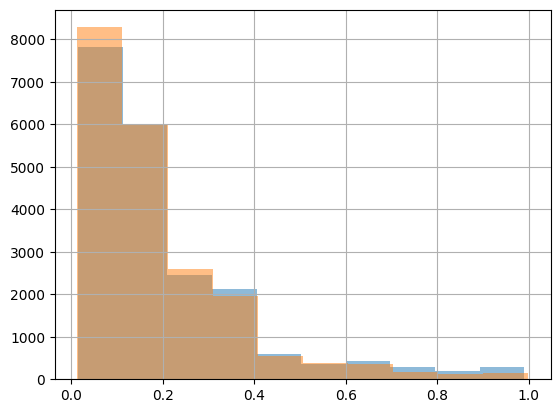

valence


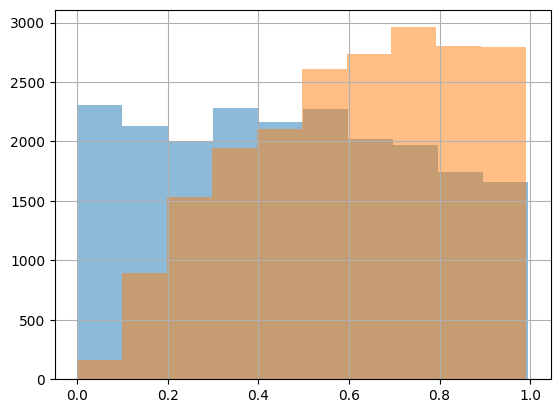

tempo


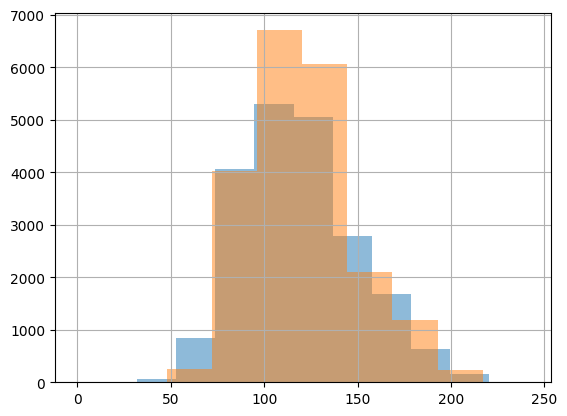

duration_ms


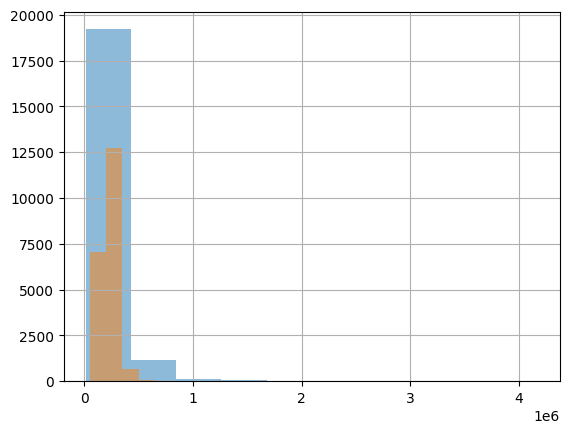

time_signature


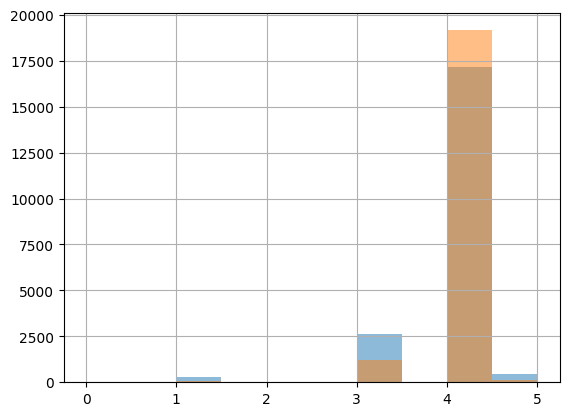

chorus_hit


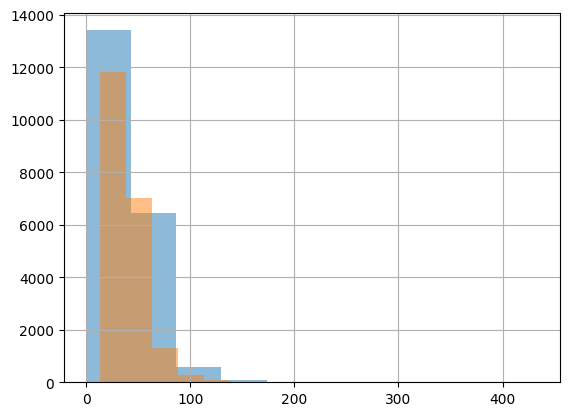

sections


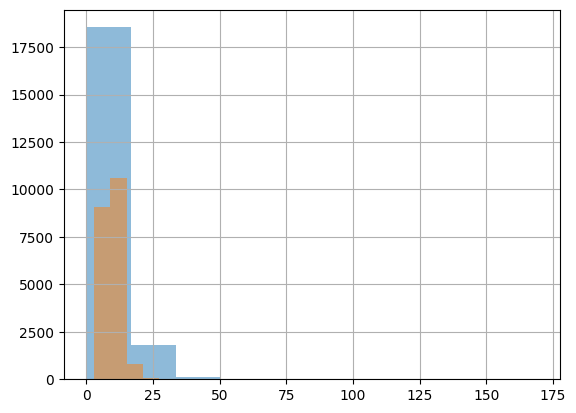

In [56]:
for feature in df_with_numerical_features.columns:
    if feature == 'target':
        continue
    print(feature)
    _ = df_merged.groupby('target')[feature].hist(alpha=0.5)
    plt.show()

## Corrolation of features

This to find out more about the features, and whether there are duplicate features (if two features have a very high corrolation, we can remove one as they bring no useful information)

<Axes: >

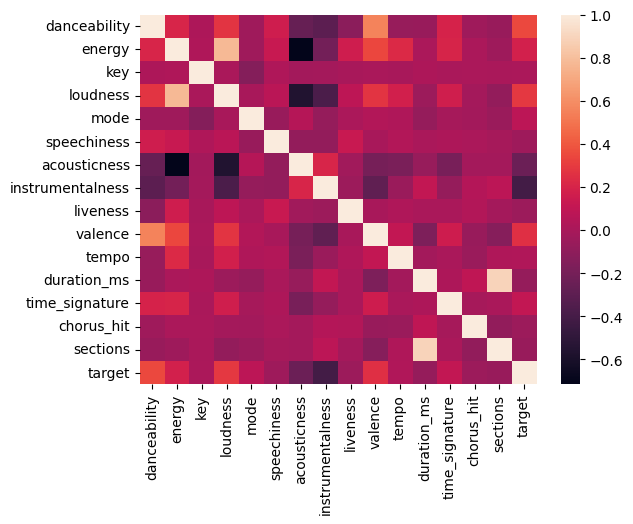

In [13]:
sns.heatmap(df_with_numerical_features.corr())

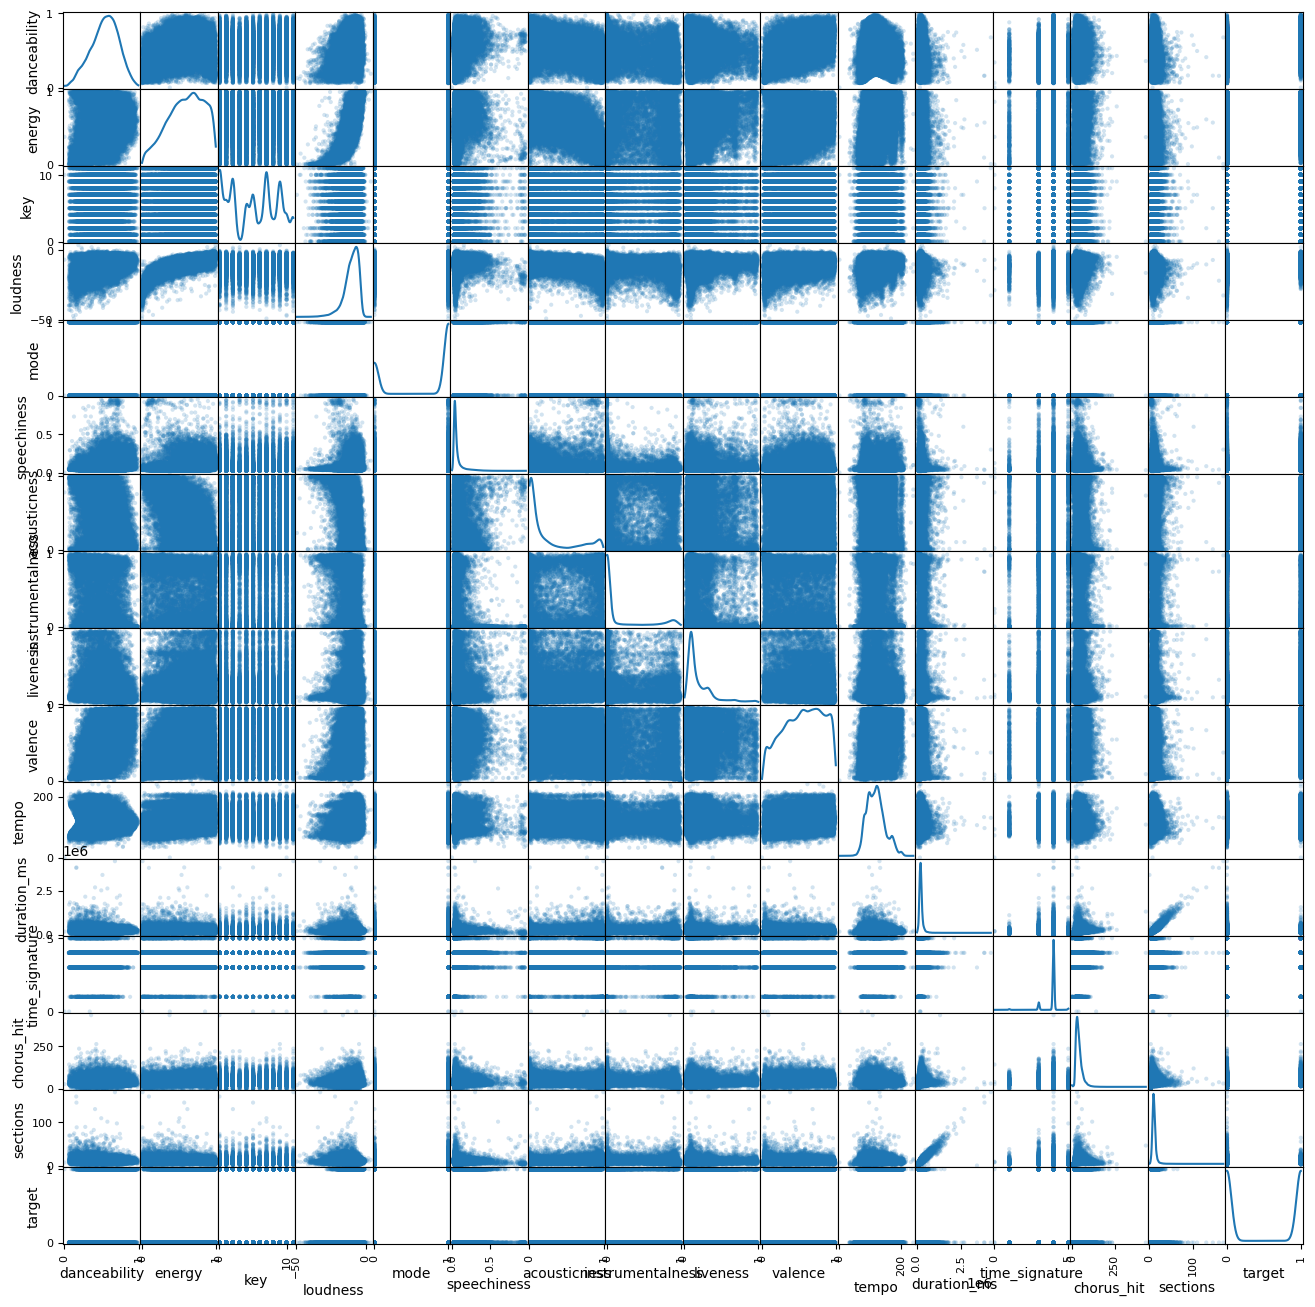

In [47]:
_ = pd.plotting.scatter_matrix(df_merged, alpha=0.2, figsize=(16, 16), diagonal='kde')